Dataset: UCI Heart Disease

Download from here:
https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci

Load it with pandas:

In [18]:
import pandas as pd

df = pd.read_csv('heart.csv')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Understanding the features:

**age**:  The patient’s age in years.

**sex** :

* 1 = Male
* 0 = Female

**cp** (Chest pain type) : type of chest pain experienced by the patient (categorical variable, often coded 0–3):

* 0 = Typical angina (classic chest pain with exertion, relieved by rest/meds)
* 1 = Atypical angina (unusual chest pain, not classic symptoms)
* 2 = Non-anginal pain (not related to the heart)
* 3 = Asymptomatic (no pain, but disease may still exist)

**trestbps** (resting blood pressure) : Resting blood pressure in mm Hg (measured when patient is at rest).

**chol** (serum cholesterol) : Cholesterol level in mg/dL.

**thalach** (maximum heart rate achieved): Maximum heart rate reached during exercise test.

**oldpeak** (ST depression induced by exercise relative to rest) :Depression in the ST segment of the ECG during exercise.

**slope** (slope of peak exercise ST segment): Shape of the ST segment in exercise ECG (coded as 0–2):

* 0 = Upsloping (less concerning)
* 1 = Flat (more concerning)
* 2 = Downsloping (strongly abnormal, highly predictive of disease).

**ca** (number of major vessels colored by fluoroscopy): Number of major blood vessels (0–3) visible in fluoroscopy.

**thal** (thalassemia type): Blood disorder type, coded as:

* 1 = Fixed defect (permanent damage, e.g., scar)
* 2 = Normal
* 3 = Reversible defect (blood flow issue that can be improved).

Related to blood flow and oxygen delivery.

**Target variable**

target:
* 1 = Patient has heart disease
* 0 = No heart disease

So overall:

* Demographic features: age, sex
* Clinical symptoms/tests: cp, trestbps, chol, thalach, oldpeak, slope
* Imaging results: ca, thal
* Label: target

***Data Preprocessing***

Checking if any features have null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***Missing values***

Checking if  "trestbps", "chol" has zeros in some rows, because:

**trestbps (resting blood pressure, mm Hg)**

* Physiologically, resting blood pressure should never be 0 (that would mean no circulation → death).

=> Nulls or 0 values here are almost certainly missing or incorrectly entered data.

**chol (serum cholesterol, mg/dl)**

* A cholesterol of 0 mg/dl is biologically impossible (everyone has cholesterol in their blood).

=>So 0 here usually means missing measurement.

In [22]:
cols_to_check = ["trestbps", "chol"]

# Count zeros in each column
print((df[cols_to_check] == 0).sum())

# (Optional) see the rows that contain zeros
problematic_rows = df[(df[cols_to_check] == 0).any(axis=1)]
print(problematic_rows)

trestbps    0
chol        0
dtype: int64
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


No zeros for these features.

Now, we have also "oldpeak" = ST depression induced by exercise relative to rest (measured in mm).

In a real clinical scenario, a patient can have 0.0 ST depression if their ECG didn’t show any depression compared to rest.

So:

**Valid** to have 0 → means no ST depression.

But **negative values would be strange/unlikely** (ECG elevation is possible, but in most datasets, negative values are either very rare or data entry mistakes).

***So I'll check for negative values.***

In [23]:
df[df["oldpeak"] < 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


**Outliers**
* Checking extreme values (e.g., blood pressure = 300, cholesterol = 0).
* Deciding whether they are real cases or data errors.

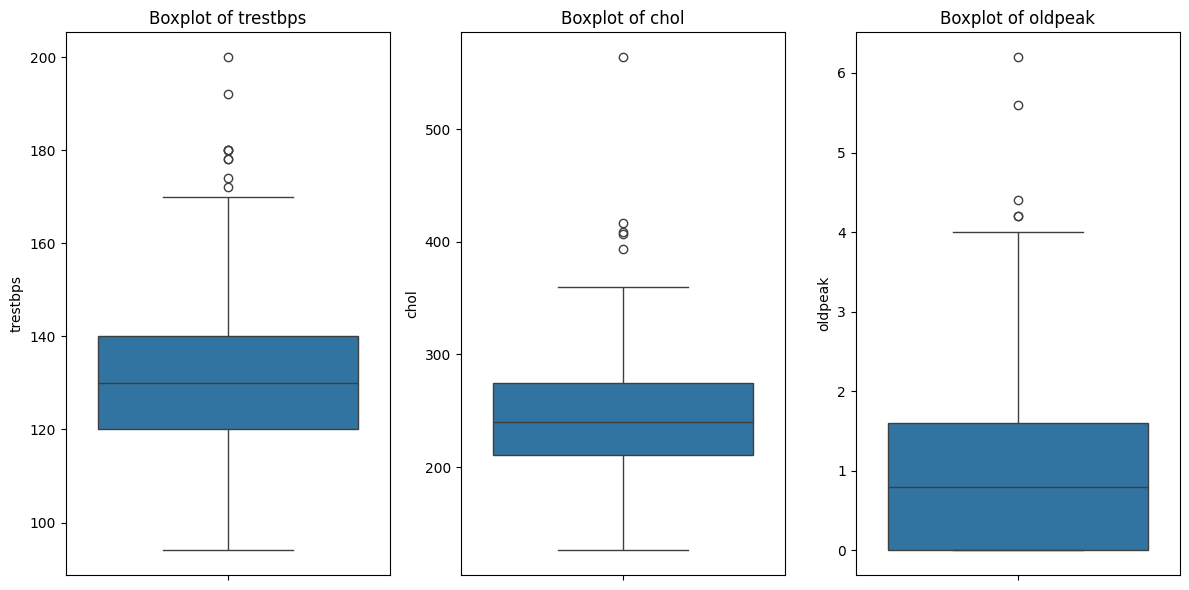

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to check
features = ["trestbps", "chol", "oldpeak"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [25]:
outliers_chol = df[df["chol"]>=500]

# print(outliers_chol)

print(len(outliers_chol))

1


In [26]:
print(outliers_chol.iloc[0])

age          67.0
sex           0.0
cp            2.0
trestbps    115.0
chol        564.0
fbs           0.0
restecg       0.0
thalach     160.0
exang         0.0
oldpeak       1.6
slope         1.0
ca            0.0
thal          3.0
target        1.0
Name: 85, dtype: float64


This case could be real, because such extremely high cholesterol values do exist in medical practice (genetic disorders like familial hypercholesterolemia).

***Classes Balance***

Let's check if target classes are balanced or not to see if there's a potential bias after.

In [32]:
df['target'].value_counts(normalize=True) * 100
# this will give me percetage instead of raw numbers

,proportion
target,
1,54.455446
0,45.544554


As we can see ~54% vs ~45% is close enough to balanced.

All we need now is to make sure we stratify our train/test split so both sets keep roughly the same proportion of 0s and 1s.

***Training phase***

In [34]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target',axis=1)

y = df["target"]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42) # max_iter=1000 => ensures convergence.

model.fit(X_train,y_train)  #fit => learns the relationship between features (X_train) and target (y_train).

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)[:,1]

***Performance Evaluation***



In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("ROC AUC is ", roc_auc_score(y_test, y_prob))


[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC AUC is  0.8690476190476191


Next ... plotting performance results for better readness + explainability